In [1]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession
#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  2


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9886563230467794896
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14272167936
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12207439668279319907
 physical_device_desc: "device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:17:00.0, compute capability: 8.6"
 xla_global_id: 416903419,
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 14272167936
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14624149936717697938
 physical_device_desc: "device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:73:00.0, compute capability: 8.6"
 xla_global_id: 2144165316]

In [2]:

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [4]:
def design(name):
    print('\033[1m|============================================================================|\033[0;m')
    print('\033[1m|===========| (%s) \033[0;m' % (name))
    print('\033[1m|============================================================================|\033[0;m\n')

def design_data(name, data):
    print('\033[1m|============================================================================|\033[0;m')
    print('\033[1m|===========| (%s)\033[0;m: ======>  (%s)' % (name, data))
    print('\033[1m|============================================================================|\033[0;m\n')

# Libraries

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.utils import shuffle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from nltk.tokenize import wordpunct_tokenize

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

import time


import tensorflow 
from keras.layers import Embedding
#import tensorflow.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras import layers
from keras.layers import GlobalMaxPool1D
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, BatchNormalization

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import wordpunct_tokenize
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical


from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras_preprocessing.sequence import pad_sequences



from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score

In [6]:
file_path = "new_dataset.csv"

dataset = pd.read_csv(file_path, usecols=['comment', 'label'])




# Exploring dataset

In [7]:
#dataset.sample(frac=1).head()
dataset=dataset.sample(frac=1,random_state=1500)
dataset=dataset.iloc[:1000,:]

In [8]:
# shuffling dataset
dataset = shuffle(shuffle(dataset.sample(frac=1, random_state=1200).reset_index(drop=True)))
original_dataset_size = len(dataset)

In [9]:
dataset.sample(frac=1).head()

,comment,label
398,ٹویٹرکا صارفین کے لیے نیا فیچر,0
383,اب کانٹیکٹ لینس سے ویڈیو ریکارڈ اور اسٹور کرنا...,0
369,چینی رٹسٹ کا کمال چوپ سٹکس کے ذریعے انوکھا فن ...,0
161,فواد چوہدری اور تانیہ ایدورس کی یوٹیوب پر ممکن...,0
265,ایپل نے ائی فون سست کرنے پر معافی مانگ لی,0


# Data Pre-Processing

In [10]:
#: checking null values.
dataset.isnull().any()

comment    False
label      False
dtype: bool

In [11]:
dataset.isnull().sum()

comment    0
label      0
dtype: int64

# Instances Per-Class

In [12]:
per_class_instances = dataset['label'].value_counts()
per_class_instances = pd.DataFrame(per_class_instances, columns=['label'])
per_class_instances

,label
1,501
0,499


In [13]:
#visualizing class
label_ = []

for line in dataset['label']:
    if line == 1:
        label_.append('1')
    elif line == 0:
        label_.append('0')
    

In [14]:
len(label_), len(dataset['label'])


(1000, 1000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


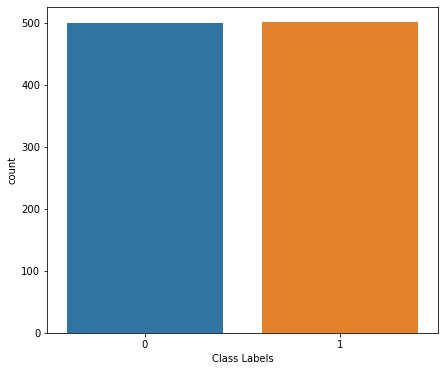

In [15]:
plt.figure(figsize=(7,6))
sb.countplot(label_)
plt.xlabel('Class Labels')
plt.show()

# Cleaning dataset

In [16]:
comment = []
clas = []


#: cleaning title
for line in dataset['comment']:
    new_line = re.sub(r'\d+', '', str(line))
    final_line = re.sub(r'[a-zA-Z]', '', str(new_line))
    comment.extend([re.sub(r"[^\w\s]", '', str(final_line))])

#: append class
for line in dataset['label']:
    clas.extend([re.sub(r"[^\s\w]", '', str(line))])
    
    
#: r"\b\d+\b",


In [17]:
new_data = pd.DataFrame()
new_data['comment'] = comment
new_data['label'] = clas

In [18]:
dataset = new_data
dataset

,comment,label
0,بلوچستان بجلی صارفین اربوں روپے کے نادہندہ نیب...,0
1,امریکا میں سونے کے نرخوں میں اضافہ یورپ اور ای...,1
2,باغبان اپنے باغات کی بعد از برداشت سنبھال میں ...,1
3,اب پاکستان میں سی سی گاڑی مناسب پیسوں میں,0
4,انسٹا گرام پر دوستوں کی بھیجی گئی تصاویر کو ای...,0
...,...,...
995,حویلیاں ڈرائی پورٹ منصوبے پر پیش رفت جاری,1
996,مکئی کی فصل کو جڑی بوٹیوں سے پاک رکھنے کیلئے د...,1
997,ایف ائی اے میں ان لائن بدسلوکی کی ہزار شکایات...,0
998,اوبر پچ مقامی اسٹارٹ اپس کو تحریک مہیا کرے گا,1


In [19]:
total_words = 0

for line in dataset['comment']:
    for words in line.split():
        total_words += 1

# Data Splitting

In [20]:
x = dataset['comment']
y = dataset['label'] 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)
X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(x, y, test_size=0.3, random_state=1000)

In [21]:
#: counting per-class instances in y_train

one_ = 0
zero_ = 0

#: instances in y_train
for i in y_train:
    if i == '1':
        one_ += 1
    elif i == '0':
        zero_ += 1
  

#: ================

design_data('Train dataset', len(X_train))

#: per-class instances

design_data('Class-1', one_)
design_data('Class-0', zero_)


|============================================================================|
|===========| (Train dataset): ======>  (700)
|============================================================================|

|============================================================================|
|===========| (Class-1): ======>  (347)
|============================================================================|

|============================================================================|
|===========| (Class-0): ======>  (353)
|============================================================================|



In [22]:
#: counting per-class instances in y_train

one_ = 0
zero_ = 0

#: instances in y_train
for i in y_test:
    if i == '1':
        one_ += 1
    elif i == '0':
        zero_ += 1
  

#: ================

design_data('Test dataset', len(X_test))

#: per-class instances

design_data('Class-1', one_)
design_data('Class-0', zero_)


|============================================================================|
|===========| (Test dataset): ======>  (300)
|============================================================================|

|============================================================================|
|===========| (Class-1): ======>  (154)
|============================================================================|

|============================================================================|
|===========| (Class-0): ======>  (146)
|============================================================================|



# Label-Encoder

In [23]:
#: Encoding target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test  = encoder.transform(y_test)


y_train_dnn = encoder.fit_transform(y_train_dnn)
y_test_dnn  = encoder.transform(y_test_dnn)


# Feature-Extraction

In [24]:
train_data = X_train
test_data = X_test

In [25]:
freezing_words = [ 'ہے', 'ہیں', 'تھا', 'تھے', 'کے']


In [26]:
tfidf = TfidfVectorizer(analyzer='word', max_df=0.8, min_df=4, ngram_range=(1,1), stop_words=freezing_words, sublinear_tf=True, tokenizer=wordpunct_tokenize)

train_data_x = tfidf.fit_transform(train_data)
test_data_x = tfidf.transform(test_data)



In [27]:
train_data = pd.DataFrame(train_data_x.toarray())
test_data = pd.DataFrame(test_data_x.toarray())

In [28]:
design('Final-Shapes')
print('Train-Dataset shape: ==>', train_data.shape, ' <-----> ', y_train.shape)
print('Test-Dataset shape: ==>', test_data.shape, '   <-----> ', y_test.shape)


|============================================================================|
|===========| (Final-Shapes) 
|============================================================================|

Train-Dataset shape: ==> (700, 409)  <----->  (700,)
Test-Dataset shape: ==> (300, 409)    <----->  (300,)


# Feature-Selection ==> [chi_2]

In [29]:
train_data.shape, test_data.shape

((700, 409), (300, 409))

In [30]:
import numpy as np

#: selecting 950 features


def features_finder(train, y, test):
    #chi2_fs = SelectKBest(chi2, k=950)
    chi2_fs = SelectKBest(chi2, k=64)
    chi2_fs.fit(train, y)  #: find the rel between x and y
    x_data_train = chi2_fs.transform(train)
    x_data_test  = chi2_fs.transform(test)
    return x_data_train, x_data_test, chi2_fs

In [31]:
X_train, X_test, chi2_fs = features_finder(train_data, y_train, test_data) 

# Important-Features:

In [32]:
X_train.shape[1]

64

In [33]:
design_data('Original Feature Extraction size', len(tfidf.get_feature_names()))
design_data('Selected Feature size', X_train.shape[1])

|============================================================================|
|===========| (Original Feature Extraction size): ======>  (409)
|============================================================================|

|============================================================================|
|===========| (Selected Feature size): ======>  (64)
|============================================================================|



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


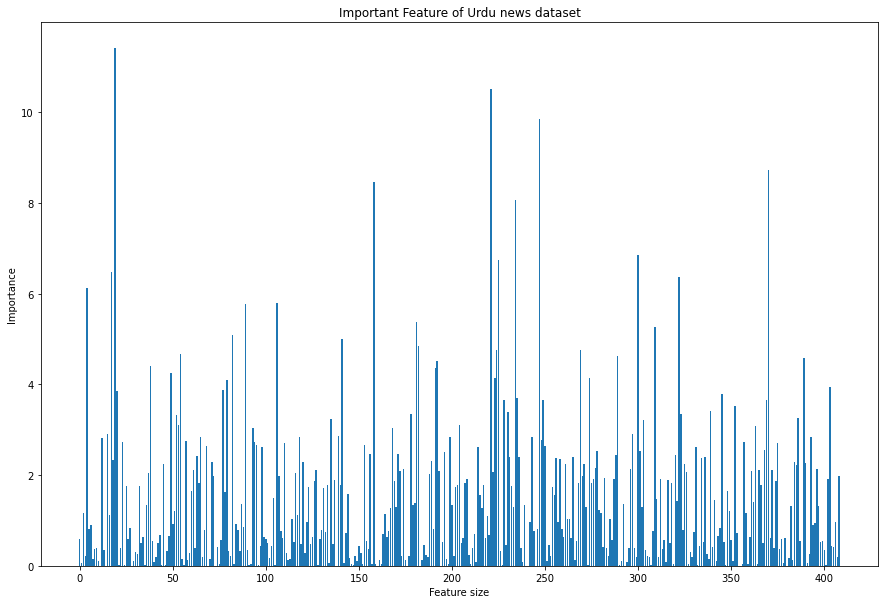

In [34]:
# plot the scores
plt.figure(figsize=(15,10))
plt.bar([i for i in range(len(chi2_fs.scores_))], chi2_fs.scores_)
plt.title('Important Feature of Urdu news dataset')
plt.xlabel('Feature size')
plt.ylabel('Importance')
plt.show()

# Algorithms using train-test split

# 1): Multinomial NB

In [35]:

mnb = MultinomialNB(alpha=1.0)
mnb_clf = mnb.fit(X_train, y_train)
mnb_predict = mnb_clf.predict(X_test)


mnb_accuracy  = round((accuracy_score(y_test, mnb_predict)), 2)*100
mnb_precision = round((precision_score(y_test, mnb_predict, average='macro')), 2)*100
mnb_recall = round((recall_score(y_test, mnb_predict, average='macro')), 2)*100
mnb_f1 = round((f1_score(y_test, mnb_predict, average='macro')), 2)*100
mnb_kappa = round((cohen_kappa_score(y_test, mnb_predict)), 2)*100

design_data('Accuracy', mnb_accuracy)
design_data('Precision', mnb_precision)
design_data('Recall', mnb_recall)
design_data('F1_score', mnb_f1)
design_data('Cohen Kappa', mnb_kappa)

|============================================================================|
|===========| (Accuracy): ======>  (75.0)
|============================================================================|

|============================================================================|
|===========| (Precision): ======>  (78.0)
|============================================================================|

|============================================================================|
|===========| (Recall): ======>  (75.0)
|============================================================================|

|============================================================================|
|===========| (F1_score): ======>  (74.0)
|============================================================================|

|============================================================================|
|===========| (Cohen Kappa): ======>  (50.0)
|========================================================================

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


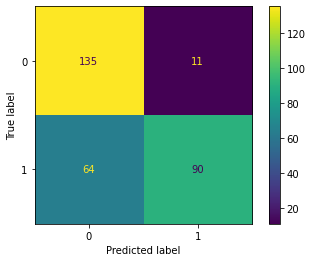

In [36]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mnb, X_test, y_test) 
plt.show()


# 2): SVM

In [37]:

svm = SVC()
svm_clf = svm.fit(X_train, y_train)
svm_predict = svm_clf.predict(X_test)


svm_accuracy  = round((accuracy_score(y_test, svm_predict)), 2)*100
svm_precision = round((precision_score(y_test, svm_predict, average='macro')), 2)*100
svm_recall = round((recall_score(y_test, svm_predict, average='macro')), 2)*100
svm_f1 = round((f1_score(y_test, svm_predict, average='macro')), 2)*100
svm_kappa = round((cohen_kappa_score(y_test, svm_predict)), 2)*100

design_data('Accuracy', svm_accuracy)
design_data('Precision', svm_precision)
design_data('Recall', svm_recall)
design_data('F1_score', svm_f1)
design_data('Cohen Kappa', svm_kappa)

|============================================================================|
|===========| (Accuracy): ======>  (75.0)
|============================================================================|

|============================================================================|
|===========| (Precision): ======>  (79.0)
|============================================================================|

|============================================================================|
|===========| (Recall): ======>  (76.0)
|============================================================================|

|============================================================================|
|===========| (F1_score): ======>  (75.0)
|============================================================================|

|============================================================================|
|===========| (Cohen Kappa): ======>  (51.0)
|========================================================================

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


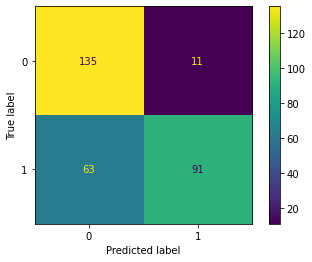

In [38]:
plot_confusion_matrix(svm, X_test, y_test) 
plt.show()


# 3):  Deep Learning

In [39]:
# paramters
from tensorflow.keras.optimizers import SGD

EPOCHS = 10            # <============= [increase it while running on 'work-statsion']
#BATCH_SIZE = 120      # <============= [decrease it while running on 'work-station']
BATCH_SIZE = 30      # <============= [decrease it while running on 'work-station']
opt = SGD(lr=0.01)   # <============= [the more you decrease the better deep-learning model will be]


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [40]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

import time
from keras import Sequential
from keras.layers import Dense, Dropout

In [41]:
#: input_shape changed
input_shape_ = X_train.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_shape_,), activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(200, activation='relu'))  #1
model.add(Dropout(0.5))
model.add(Dense(160, activation='relu'))  #2
model.add(Dropout(0.8))
model.add(Dense(120, activation='relu'))  #3
model.add(Dropout(0.7))
model.add(Dense(80, activation='relu'))   #4
model.add(Dropout(0.75))
model.add(Dense(2, activation='softmax')) #: 2
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


#: training-1 algo 1
#:############ Using all-stopwords
##############
print("Compile dnn model using no-stop-words ...")
estimator_3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)
dnn_3_train = model.evaluate(X_train, y_train)
dnn_3_test  = model.evaluate(X_test, y_test)
print('All-good!')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               51400     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 160)               32160     
                                                                 
 dropout_2 (Dropout)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               1

# DNN evaluation

In [42]:
#####################: evaluation measures
#: making predictions
yhat_probs = model.predict(X_test, verbose=0)   

# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(X_test), axis=-1)

# reduce to 1d array
yhat_probs = yhat_probs
yhat_classes = yhat_classes
 
# accuracy: 
dnn_1_accuracy = round(accuracy_score(y_test, yhat_classes), 2)*100

# precision
dnn_1_precision = round(precision_score(y_test, yhat_classes, average='macro'), 2)*100

# recall: 
dnn_1_recall = round(recall_score(y_test, yhat_classes, average='macro'), 2)*100
# f1:
dnn_1_f1 = round(f1_score(y_test, yhat_classes, average='macro'),2)*100
 
# kappa
dnn_1_kappa = round(cohen_kappa_score(y_test, yhat_classes), 2)*100

print('All-good!')
print()
design_data('Accuracy', dnn_1_accuracy)
design_data('Precision', dnn_1_precision)
design_data('Recall', dnn_1_recall)
design_data('F1_score', dnn_1_f1)
design_data('Cohen Kappa', dnn_1_kappa)

10/10 [==============================] - 0s 4ms/step
All-good!

|============================================================================|
|===========| (Accuracy): ======>  (65.0)
|============================================================================|

|============================================================================|
|===========| (Precision): ======>  (78.0)
|============================================================================|

|============================================================================|
|===========| (Recall): ======>  (66.0)
|============================================================================|

|============================================================================|
|===========| (F1_score): ======>  (61.0)
|============================================================================|

|============================================================================|
|===========| (Cohen Kappa): ======>  (31.0)
|========

# 4): CNN



Important Note:

while running on work-station if the CNN's loss is nan then replace the optimizer=opt with optimizer='adam'




In [43]:

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import  pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_dnn) 

X_train_seq = tokenizer.texts_to_sequences(X_train_dnn)
X_test_seq = tokenizer.texts_to_sequences(X_test_dnn)

vocab_size = len(tokenizer.word_index)+1  

maxlen = 100

X_train = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)




In [44]:
import time
#import tensorflow as tf

In [45]:

embedding_dim = 300

#####

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim=embedding_dim, input_length=maxlen))
#: 1 con+poolin
model.add(Conv1D(528, 6))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.05))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.3))
model.add(Dense(200)) #: 3
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.8))
model.add(Dense(420, activation='relu')) #: 4
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.5))
model.add(Dense(1, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          893100    
                                                                 
 conv1d (Conv1D)             (None, 95, 528)           950928    
                                                                 
 batch_normalization (BatchN  (None, 95, 528)          2112      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 95, 528)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 528)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_5 (Dropout)         (None, 528)              

In [ ]:
cnn_start = time.time()
model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), batch_size=BATCH_SIZE)
cnn_stop = time.time()


cnn_loss_train, cnn_accuracy_train = model.evaluate(X_train, y_train, verbose=False)
cnn_loss_test, cnn_accuracy_test = model.evaluate(X_test, y_test, verbose=False)


Epoch 1/10


# CNN Evaluation

In [ ]:
#####################: evaluation measures
#: making predictions
yhat_probs = model.predict(X_test, verbose=0) 

# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(X_test), axis=-1)

# reduce to 1d array
yhat_probs = yhat_probs
yhat_classes = yhat_classes
 
# accuracy: 
cnn_accuracy = round(accuracy_score(y_test, yhat_classes), 2)*100

# precision
cnn_precision = round(precision_score(y_test, yhat_classes, average='macro'), 2)*100

# recall: 
cnn_recall = round(recall_score(y_test, yhat_classes, average='macro'), 2)*100
# f1:
cnn_f1 = round(f1_score(y_test, yhat_classes, average='macro'),2)*100
 
# kappa
cnn_kappa = round(cohen_kappa_score(y_test, yhat_classes), 2)*100

print('All-good!')
print()
design_data('Accuracy', cnn_accuracy)
design_data('Precision', cnn_precision)
design_data('Recall', cnn_recall)
design_data('F1_score', cnn_f1)
design_data('Cohen Kappa', cnn_kappa)
print('All-good')

# 4): LSTM

In [ ]:
X = dataset['comment']
Y = dataset['label']

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', max_df=0.8, min_df=4, ngram_range=(1,1), stop_words=freezing_words, sublinear_tf=True, tokenizer=wordpunct_tokenize).fit(X)


tfidf_vector_X = vectorizer.transform(X).toarray()  #//shape - (3,6)
tfidf_vector_Y = vectorizer.transform(Y).toarray() #//shape - (3,6)
tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
tfidf_vector_Y = tfidf_vector_Y[:, :, None] #//shape - (3,6,1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector_X, tfidf_vector_Y, test_size = 0.3, random_state = 1500)

In [ ]:
from keras import Sequential
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=512, input_shape = X_train.shape[1:], return_sequences = True))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=8, return_sequences=True, name='output'))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

print(model.summary())

In [ ]:
# fitting the model
lstm_start = time.time()
model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), batch_size=BATCH_SIZE)
lstm_stop = time.time()


# LSTM-Evaluation

In [ ]:
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [ ]:
#####################: evaluation measures
#: making predictions
yhat_probs = model.predict(X_test, verbose=0) 

# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(X_test), axis=-1)

yhat_probs = yhat_probs.reshape(-1, 1)
yhat_classes = yhat_classes.reshape(-1, 1)
 
# accuracy: 
lstm_accuracy = round(accuracy_score(y_test, yhat_classes), 2)*100

# precision
lstm_precision = round(precision_score(y_test, yhat_classes, average='macro'), 2)*100

# recall: 
lstm_recall = round(recall_score(y_test, yhat_classes, average='macro'), 2)*100
# f1:
lstm_f1 = round(f1_score(y_test, yhat_classes, average='macro'),2)*100
 
# kappa
lstm_kappa = round(cohen_kappa_score(y_test, yhat_classes), 2)*100

print('All-good!')
print()
design_data('Accuracy', lstm_accuracy)
design_data('Precision', lstm_precision)
design_data('Recall', lstm_recall)
design_data('F1_score', lstm_f1)
design_data('Cohen Kappa', lstm_kappa)
print('All-good')

# 5): Bi-LSTM

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', max_df=0.8, min_df=4, ngram_range=(1,1), stop_words=freezing_words, sublinear_tf=True, tokenizer=wordpunct_tokenize).fit(X)


tfidf_vector_X = vectorizer.transform(X).toarray()  #//shape - (3,6)
tfidf_vector_Y = vectorizer.transform(Y).toarray() #//shape - (3,6)
tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
tfidf_vector_Y = tfidf_vector_Y[:, :, None] #//shape - (3,6,1)


X_train, X_test, y_train, y_test = train_test_split(tfidf_vector_X, tfidf_vector_Y, test_size = 0.3, random_state = 1500)

In [ ]:
from keras import Sequential
from keras.layers import LSTM

model = Sequential()
model.add(Bidirectional(LSTM(units=512, input_shape = X_train.shape[1:], return_sequences = True)))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=8, return_sequences=True, name='output'))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
#sgdba
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.build(X_train.shape)
print(model.summary())

In [ ]:
# fitting the model
bi_lstm_start = time.time()
model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), batch_size=BATCH_SIZE)
bi_lstm_stop = time.time()


# Evalutating Bi-LSTM

In [ ]:
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [ ]:
#####################: evaluation measures
#: making predictions
yhat_probs = model.predict(X_test, verbose=0) 

# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(X_test), axis=-1)
yhat_classes = np.reshape(yhat_classes, (yhat_classes.shape[0], 1, yhat_classes.shape[1]))

yhat_probs = yhat_probs.reshape(-1, 1)
yhat_classes = yhat_classes.reshape(-1, 1)
 
# accuracy: 
bi_lstm_accuracy = round(accuracy_score(y_test, yhat_classes), 2)*100

# precision
bi_lstm_precision = round(precision_score(y_test, yhat_classes, average='macro'), 2)*100

# recall: 
bi_lstm_recall = round(recall_score(y_test, yhat_classes, average='macro'), 2)*100
# f1:
bi_lstm_f1 = round(f1_score(y_test, yhat_classes, average='macro'),2)*100
 
# kappa
bi_lstm_kappa = round(cohen_kappa_score(y_test, yhat_classes), 2)*100

print('All-good!')
print()
design_data('Accuracy', bi_lstm_accuracy)
design_data('Precision', bi_lstm_precision)
design_data('Recall', bi_lstm_recall)
design_data('F1_score', bi_lstm_f1)
design_data('Cohen Kappa', bi_lstm_kappa)
print('All-good')

# Comparision of all models

In [ ]:
models = pd.DataFrame({
    'NB':  [mnb_precision, mnb_recall, mnb_f1, mnb_kappa],
    'SVM': [svm_precision, svm_recall, svm_f1, svm_kappa ],
    'DNN': [dnn_1_precision, dnn_1_recall, dnn_1_f1, dnn_1_kappa],
    'CNN':  [cnn_precision, cnn_recall, cnn_f1, cnn_kappa],
    'LSTM':  [lstm_precision, lstm_recall, lstm_f1, lstm_kappa],
    'Bi-LSTM':  [bi_lstm_precision, bi_lstm_recall, bi_lstm_f1, bi_lstm_kappa]
    
}, index=['Precision', 'Recall', 'F1', 'Cohen Kappa'] )

# Comparision in Tabular format

In [ ]:
# tabular comparision
models

In [ ]:
# Visualizing all results

models.plot(kind='bar', figsize=(15, 10))
plt.title('Results')
plt.xlabel('Evaluation-Measures')
plt.ylabel('Measurements')

# saving the Comparision graph
plt.savefig("model_comparisions_bar.pdf", format="pdf", bbox_inches="tight")

plt.show()

# Line-Graph

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.lineplot(data=models)

# saving the Comparision graph
plt.savefig("model_comparisions_line.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
plt.figure(figsize=(10, 10))

models.plot.line(subplots=True, figsize=(10, 10))

plt.show()

In [ ]:
# saving the model results
models.to_csv("model_results.csv")

print("Model-Results saved!")

# ==================== [ Work-Done Here ] ======================


